<a href="https://colab.research.google.com/github/vdnghia03/Deep-Learning/blob/main/LetNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Letnet 5

---

| Tầng   | Loại            | Kích thước đầu ra (ước lượng) | Ghi chú            |
| ------ | --------------- | ----------------------------- | ------------------ |
| Input  | -               | 32×32×1                       | Ảnh đầu vào        |
| C1     | Conv2D(6,5×5)   | 28×28×6                       | Tích chập          |
| S2     | AvgPooling      | 14×14×6                       | Lấy mẫu trung bình |
| C3     | Conv2D(16,5×5)  | 10×10×16                      | Tích chập          |
| S4     | AvgPooling      | 5×5×16                        | Giảm kích thước    |
| C5     | Conv2D(120,5×5) | 1×1×120                       | Học đặc trưng sâu  |
| F6     | Dense(84)       | 84                            | Fully Connected    |
| Output | Dense(classes)  | classes                       | Softmax            |


In [ ]:
from tensorflow.keras import Model
import tensorflow as tf
import typing

from tensorflow.keras.layers import (
    AveragePooling2D,
    Conv2D,
    Dense,
    Flatten,
    Input,

)

In [ ]:
from os import name
tf.config.run_functions_eagerly(True)


@tf.function
def LeNet5(input_shape: typing.Tuple[int,...], classes: int = 1000) -> Model:
  """
    Implementation of the classic LeNet architecture.

    Arguments:
    input_shape -- shape of the images of the dataset
    classes     -- integer, number of classes

    Returns:
    model       -- a Model() instance in Keras

  """
  X_input = Input(input_shape)

  # Layer C1 + A1: Convolution and Pooling
  X = Conv2D(
      filters = 6
      , kernel_size = (5,5)
      , strides = (1,1)
      , activation="relu"
      , padding = "valid"
      , name = 'C1'
  )(X_input)


  X = AveragePooling2D(
      pool_size = (2,2)
      , strides = (2,2)
      , padding = "valid"
      , name = 'A1'
  )(X)

  # Layer C2 + A2:
  X = Conv2D(
      filters = 16
      , kernel_size = (5,5)
      , strides = (1,1)
      , activation="relu"
      , padding = "valid"
      , name = 'C2'
  )(X)

  X = AveragePooling2D(
      pool_size = (2,2)
      , strides = (2,2)
      , padding = "valid"
      , name = 'A2'
  )(X)

  # Layer 3
  X = Conv2D(
      filters = 120
      , kernel_size = (5,5)
      , strides = (1,1)
      , activation="relu"
      , padding = "valid"
      , name = 'C3'
  )(X)

  # Flatten
  X = Flatten()(X)

  # Layer 4
  X = Dense(
      units = 84
      , activation="relu"
      , name = 'F4'
  )(X)

  # Layer 5
  X = Dense(
      units = classes
      , activation = 'softmax'
      , name = 'F5'
  )(X)

  model = Model(inputs = X_input, outputs = X, name = 'LeNet5')

  return model



---
## Áp dụng mô hình Lenet5

### 1. Chuẩn bị dữ liệu

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.datasets.mnist import load_data

plt.style.use("seaborn-v0_8-white")

# --- Tải dữ liệu MNIST ---
(X_train, y_train), (X_test, y_test) = load_data("mnist.npz")

print("Trước khi xử lý:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

Trước khi xử lý:
X_train: (60000, 28, 28) X_test: (10000, 28, 28)
y_train: (60000,) y_test: (10000,)


In [ ]:

# --- Chuẩn hóa và reshape ---
x_train = X_train.astype("float32") / 255.0
x_test = X_test.astype("float32") / 255.0

# Thêm trục kênh (1 kênh grayscale)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# 🔹 Padding để thành (32, 32, 1)
x_train = tf.pad(x_train, [[0,0],[2,2],[2,2],[0,0]], "CONSTANT")
x_test = tf.pad(x_test, [[0,0],[2,2],[2,2],[0,0]], "CONSTANT")

# Đảm bảo label là 1D
y_train, y_test = y_train.ravel(), y_test.ravel()


Sau khi xử lý:
x_train: (60000, 32, 32, 1) x_test: (10000, 32, 32, 1)
y_train: (60000,) y_test: (10000,)


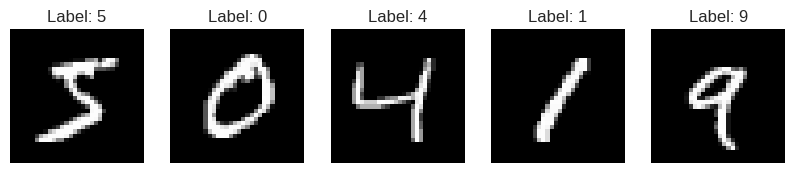

In [ ]:

print("\nSau khi xử lý:")
print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# --- Hiển thị thử vài ảnh ---
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()

### 2. Tạo Generate Loader theo Batch


In [ ]:
# batch_size = 32

# train_dataset = (
#     tf.data.Dataset.from_tensor_slices((x_train, y_train))
#     .shuffle(60000)
#     .batch(batch_size)
#     .prefetch(1)  # load trước 1 batch khi batch hiện tại đang chạy
# )

# test_dataset = (
#     tf.data.Dataset.from_tensor_slices((x_test, y_test))
#     .batch(batch_size)
#     .prefetch(1)
# )


### 3. Xây dựng mô hình và compile mô hình

In [ ]:
model = LeNet5(input_shape=(32, 32,1), classes=10)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "LeNet5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ A1 (AveragePooling2D)           │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C2 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ A2 (AveragePooling2D)           │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F4 (Dense)                      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F5 (Dense)                      │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


early_stopper = EarlyStopping(
    monitor = "val_loss"
    , mode = "min"
    , patience = 15
)

model.fit(
    x_train
    , y_train
    , epochs = 10
    , callbacks = [early_stopper]
    , validation_split = 1/5
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 118s 78ms/step - accuracy: 0.8302 - loss: 0.5506 - val_accuracy: 0.9660 - val_loss: 0.1129
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 114s 76ms/step - accuracy: 0.9711 - loss: 0.0911 - val_accuracy: 0.9769 - val_loss: 0.0755
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 114s 76ms/step - accuracy: 0.9807 - loss: 0.0618 - val_accuracy: 0.9822 - val_loss: 0.0606
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 116s 77ms/step - accuracy: 0.9865 - loss: 0.0434 - val_accuracy: 0.9837 - val_loss: 0.0535
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 77ms/step - accuracy: 0.9894 - loss: 0.0349 - val_accuracy: 0.9824 - val_loss: 0.0643
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 117s 78ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9848 - val_loss: 0.0518
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 115s 77ms/step - accuracy: 0.9917 - loss: 0.0237 - val_accuracy: 0.9872 - val_loss: 0.0445
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 113s 75ms/step - accuracy: 0.9936 - lo

In [ ]:

metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.918208,0.266417,0.966000,0.112910
1,0.974583,0.082331,0.976917,0.075520
2,0.982125,0.056837,0.982167,0.060586
3,0.986000,0.044851,0.983750,0.053527
4,0.989417,0.035019,0.982417,0.064306


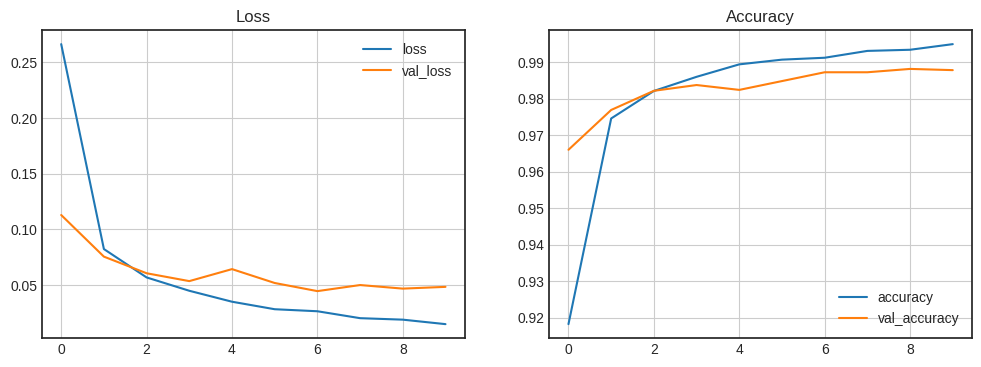

In [ ]:

def plot_metrics(metrics):
  fig, axes = plt.subplots(1,2,figsize=(12,4))
  metrics[["loss", "val_loss"]].plot(ax=axes[0], title="Loss", grid=True)
  metrics[["accuracy", "val_accuracy"]].plot(ax=axes[1], title="Accuracy", grid=True)

plot_metrics(metrics)